<a href="https://colab.research.google.com/github/Elmar1101/Data_science_projects/blob/main/deep_computer_vision_with_cnns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_sample_images
import tensorflow as tf
import matplotlib.pyplot as plt

(np.float64(-0.5), np.float64(639.5), np.float64(426.5), np.float64(-0.5))

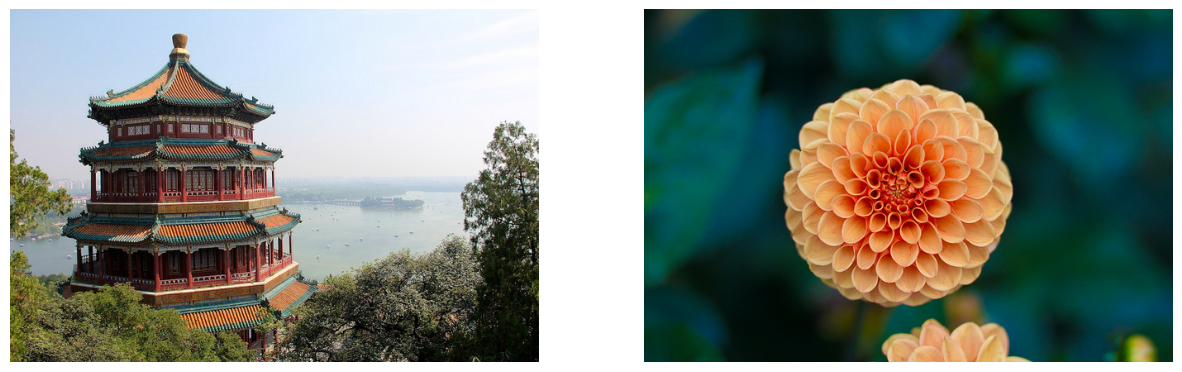

In [ ]:
images=load_sample_images()['images']
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(images[0])
plt.axis('off')
plt.subplot(122)
plt.imshow(images[1])
plt.axis('off')


(np.float64(-0.5), np.float64(119.5), np.float64(69.5), np.float64(-0.5))

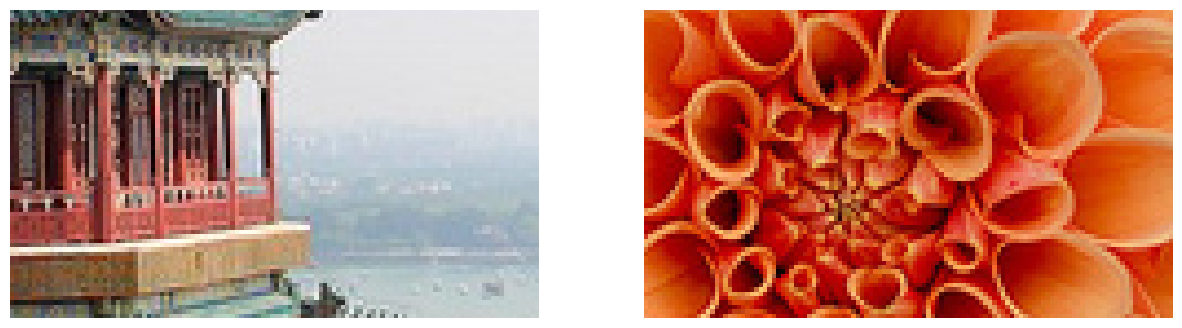

In [ ]:
images=tf.keras.layers.CenterCrop(height=70,width=120)(images)
images=tf.keras.layers.Rescaling(scale=1/255.)(images)
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(images[0])
plt.axis('off')
plt.subplot(122)
plt.imshow(images[1])
plt.axis('off')

In [ ]:
images.shape

TensorShape([2, 70, 120, 3])

In [ ]:
tf.random.set_seed(42)
conv_layer=tf.keras.layers.Conv2D(32,kernel_size=7)
fmaps=conv_layer(images)

In [ ]:
fmaps.shape

TensorShape([2, 64, 114, 32])

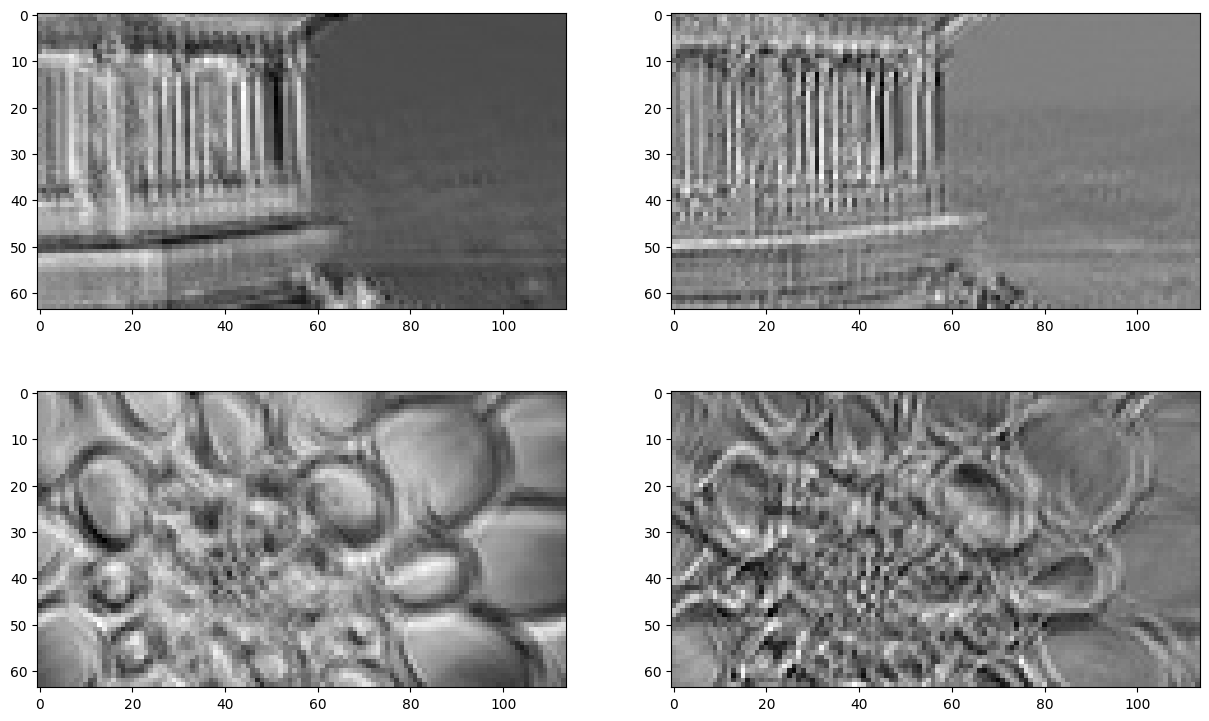

In [ ]:
plt.figure(figsize=(15,9))
for image_idx in (0,1):
    for fmap_idx in (0,1):
        plt.subplot(2,2,image_idx*2+fmap_idx+1)
        plt.imshow(fmaps[image_idx,:,:,fmap_idx],cmap='gray')

plt.show();

In [ ]:
conv_layer=tf.keras.layers.Conv2D(32,kernel_size=7,padding='same')
fmaps=conv_layer(images)

In [ ]:
fmaps.shape

TensorShape([2, 70, 120, 32])

In [ ]:
conv_layer=tf.keras.layers.Conv2D(filters=32,kernel_size=7,padding='same',strides=2)
fmaps=conv_layer(images)
fmaps.shape

TensorShape([2, 35, 60, 32])

In [ ]:
tf.random.set_seed(42)
filters=tf.random.normal([7,7,3,2])
biases=tf.zeros([2])
fmaps=tf.nn.conv2d(images,filters,strides=1,padding='SAME')+biases

# Max_Pooling

In [ ]:
max_pool=tf.keras.layers.MaxPool2D(pool_size=2)

In [ ]:
output=max_pool(images)

# global avg_pool

In [ ]:
global_avg_pool=tf.keras.layers.GlobalAvgPool2D()

In [ ]:
images.shape

TensorShape([2, 70, 120, 3])

In [ ]:
global_avg_pool=tf.keras.layers.Lambda(lambda X: tf.reduce_mean(X,axis=[1,2]))

In [ ]:
global_avg_pool(images)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.64338624, 0.5971759 , 0.5824972 ],
       [0.76306933, 0.2601113 , 0.10849128]], dtype=float32)>

# CNN Architectures
Tackling Fashion Mnist With a CNN

In [ ]:
import numpy as np
mnist=tf.keras.datasets.fashion_mnist.load_data()
(X_train_full,y_train_full),(X_test,y_test)=mnist
X_train_full=np.expand_dims(X_train_full,axis=-1).astype(np.float32)/255
X_test=np.expand_dims(X_test.astype(np.float32),axis=-1)/255
X_train,X_valid=X_train_full[:-5000],X_train_full[-5000:]
y_train,y_valid=y_train_full[:-5000],y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
X_train.shape

(55000, 28, 28, 1)

In [ ]:
model=tf.keras.Sequential([


    tf.keras.layers.Input(shape=X_train.shape[1:]),
    tf.keras.layers.Conv2D(filters=64,kernel_size=7,padding='same',activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10,activation='softmax')


])

In [ ]:
from functools import partial

DefaultConv2D=partial(tf.keras.layers.Conv2D, padding='same',activation='relu',kernel_initializer='he_normal',filters=64,kernel_size=7)
DefaultDense=partial(tf.keras.layers.Dense,units=128,activation='relu',kernel_initializer='he_normal')
DefaultMaxPool=partial(tf.keras.layers.MaxPool2D)
DefaultFlatten=partial(tf.keras.layers.Flatten)
DefaultDropout=partial(tf.keras.layers.Dropout,0.5)
model_partial=tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_train.shape[1:]),
    DefaultConv2D(),
    DefaultMaxPool(pool_size=(2,2)),
    DefaultConv2D(filters=128,kernel_size=3),
    DefaultConv2D(filters=128,kernel_size=3),
    DefaultMaxPool(),
    DefaultConv2D(filters=256,kernel_size=3),
    DefaultConv2D(filters=256,kernel_size=3),
    DefaultMaxPool(),
    DefaultFlatten(),
    DefaultDense(),
    DefaultDropout(),
    DefaultDense(units=64),
    DefaultDropout(),
    DefaultDense(units=10,activation='softmax',kernel_initializer='glorot_normal')



])

In [ ]:
model_partial.compile(loss='sparse_categorical_crossentropy',optimizer='nadam',metrics=['accuracy'])
history=model_partial.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid))
X_new_partial=X_test[:10]
y_pred_partial=model_partial.predict(X_new_partial)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='nadam',metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid))
score=model.evaluate(X_test,y_test)
X_new=X_test[:10]
y_pred=model.predict(X_new)

In [ ]:
model.summary()

# Implementing a ResNet-34 CNN Using Keras


In [ ]:
from functools import partial

DefaultConv2D=partial(tf.keras.layers.Conv2D,kernel_size=3,strides=1,padding='same',kernel_initializer='he_normal',use_bias=False)

class ResidualUnit(tf.keras.layers.Layer):
    def __init__(self,filters,strides=1,activation='relu',**kwargs):
        super().__init__(**kwargs)
        self.activation=tf.keras.activations.get(activation)
        self.main_layers=[DefaultConv2D(filters,strides=strides),
                          tf.keras.layers.BatchNormalization(),
                          self.activation,DefaultConv2D(filters),
                          tf.keras.layers.BatchNormalization()
                          ]

        self.skip_layers=[]
        if strides>1:
            self.skip_layers=[DefaultConv2D(filters,kernel_size=1,strides=strides),tf.keras.layers.BatchNormalization()]
    def call(self,inputs):
        Z=inputs
        for layer in self.main_layers:
            Z=layer(Z)
        skip_Z=inputs
        for layer in self.skip_layers:
            skip_Z=layer(skip_Z)
        return self.activation(Z+skip_Z)

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28,1]),
    DefaultConv2D(64,kernel_size=7,strides=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=3,strides=2,padding='same'),
])
prev_filters=64
for filters in [64]*3+[128]*4+[256]*6+[512]*3:
    strides=1 if filters==prev_filters else 2
    model.add(ResidualUnit(filters,strides=strides))
    prev_filters=filters
model.add(tf.keras.layers.GlobalAvgPool2D())
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [ ]:
# model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='nadam')
# history=model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid))


# Using Pretrained Models from Keras

In [ ]:
model=tf.keras.applications.ResNet50(weights='imagenet')

In [ ]:
import tensorflow as tf

images=load_sample_images()['images']

images_stacked=tf.stack(images,axis=0)

images_resized=tf.keras.layers.Resizing(height=224,width=224,crop_to_aspect_ratio=True)(images_stacked)

In [ ]:
inputs=tf.keras.applications.resnet50.preprocess_input(images_resized)

In [ ]:
inputs=tf.cast(inputs,tf.float32)

In [ ]:
Y_proba=model.predict(inputs)
Y_proba.shape

In [ ]:
top_K = tf.keras.applications.resnet50.decode_predictions(Y_proba, top=3)
for image_index in range(len(images)):
    print(f"Image #{image_index}")
    for class_id, name, y_proba in top_K[image_index]:
    print(f"{class_id} - {name:12s} {y_proba:.2%}")

# Pretrained Models for Transfer Learning

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf

dataset, info=tfds.load('tf_flowers',as_supervised=True,with_info=True)
dataset_size=info.splits['train'].num_examples
class_names=info.features['label'].names
n_classes=info.features['label'].num_classes

In [ ]:
test_set_raw,valid_set_raw,train_set_raw=tfds.load(
    'tf_flowers',
    split=['train[:10%]','train[10%:25%]','train[25%:]'],
    as_supervised=True
)

In [ ]:
plt.figure(figsize=(12,10))
index=0
for image,label in train_set_raw.take(9):
        plt.subplot(3,3,index+1)
        plt.imshow(image)
        plt.title(class_names[label])
        plt.axis('off')
        index+=1

In [ ]:
tf.keras.backend.clear_session

batch_size=32

preprocess=tf.keras.Sequential([
    tf.keras.layers.Resizing(224,224,crop_to_aspect_ratio = True),
    tf.keras.layers.Lambda(tf.keras.applications.xception.preprocess_input)
])

train_set=train_set_raw.map(lambda X,y: (preprocess(X),y),num_parallel_calls=tf.data.AUTOTUNE)
train_set=train_set.shuffle(1000,seed=42).batch(batch_size).prefetch(1)

valid_set = valid_set_raw.map(lambda X,y: (preprocess(X),y),num_parallel_calls=tf.data.AUTOTUNE).batch(batch_size)
test_set=test_set_raw.map(lambda X,y: (preprocess(X),y),num_parallel_calls=tf.data.AUTOTUNE).batch(batch_size)

In [ ]:
plt.figure(figsize=(12,10))

for image,label in train_set.take(1):
    for index in range(9):
        plt.subplot(3,3,index+1)
        plt.imshow(image[index]/2+0.5)
        plt.title(class_names[label[index]])
        plt.axis('off')

# Data Augmentation

In [ ]:
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.RandomFlip(mode='horizontal',seed=42),
    tf.keras.layers.RandomRotation(factor=0.1,seed=42),
    # tf.keras.layers.RandomContrast(factor=0.1,seed=42),

])

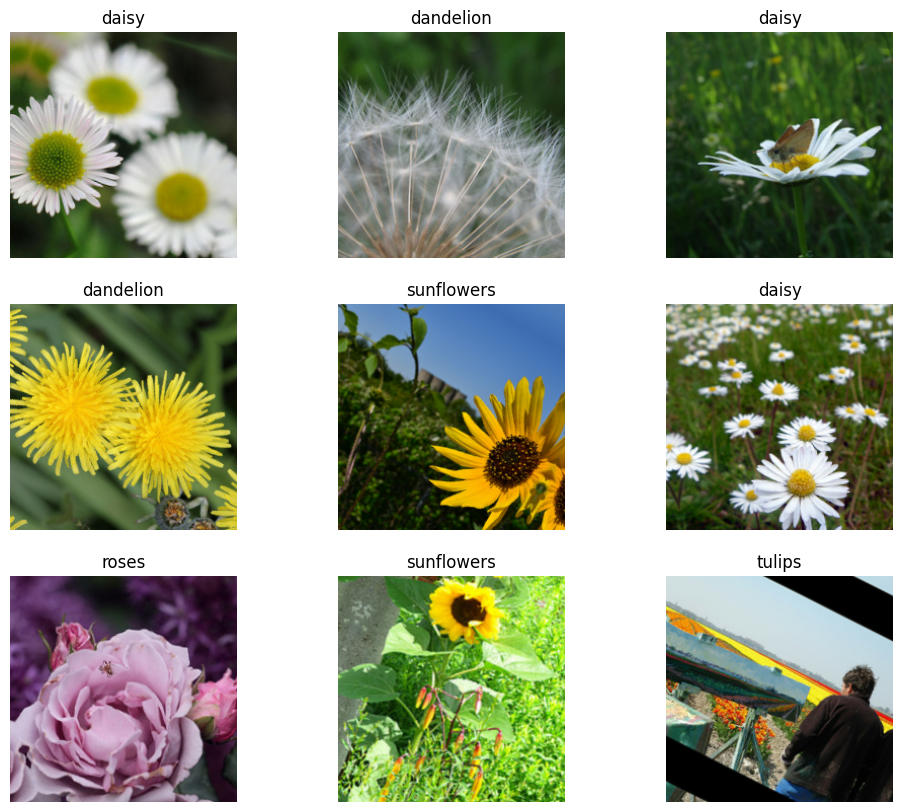

In [ ]:
plt.figure(figsize=(12,10))
for images,labels in train_set.take(1):
    augmented_images=data_augmentation(images)
    for index in range(9):
        plt.subplot(3,3,index+1)
        plt.imshow(augmented_images[index]/2+0.5)
        plt.title(class_names[labels[index]])
        plt.axis('off')